In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [3]:
df = pd.read_csv("fbpac-ads-en-US.csv")
num = 29999
df = df.loc[0:num]

In [4]:
df.head(3)

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909


In [5]:
fe = ['message']
text_df = df[fe]
text_df.head(3)

,message
0,<p>BREAKING: Trump’s Department of the Interio...
1,<p>The Mueller investigation is over. Special ...
2,<p>Zimbabwe is reeling from the impact of Cycl...


In [6]:
text_df.shape

(30000, 1)

In [7]:
from nltk.stem import SnowballStemmer
import time
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    try:
        message = message.translate(str.maketrans('', '', string.punctuation))
        words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
        return " ".join(words)
    except:
        print(message)
        

t1 = time.time()
text_df["message"].fillna(' ')
text_df["message"] = text_df["message"].apply(cleanText)
text_df.head(n = 10)    
t2 = time.time()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
text_df.head(n = 10)

,message
0,pbreak trump depart interior plan remov endang...
1,pthe mueller investig special counsel robert m...
2,pzimbabw reel impact cyclon idai famili strand...
3,pwhat final hour 2018 help us rescu one kid st...
4,psay loud say proud right health care plan par...
5,pflorida senat bill 168 would damag florida ec...
6,pthe women build transform former bayview corr...
7,plock like hillari clinton — trump offici use ...
8,pclick see ama member drive futur medicinep
9,pami klobuchar first ever presidenti fec deadl...


In [9]:
t2 - t1

380.38151693344116

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acpto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
stop=set(stopwords.words('english'))

def build_list(df,col="title"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= df[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

Text(0.5, 1.0, 'most common word in message')

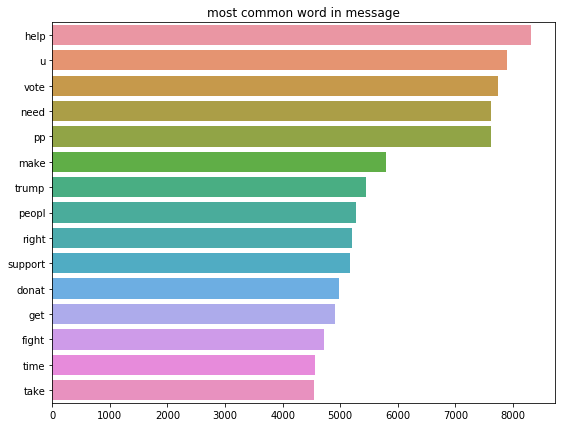

In [12]:
corpus=build_list(text_df,"message")
counter=Counter(corpus)
most=counter.most_common()
WordLib = most
x=[]
y=[]
for word,count in most[:15]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in message")

In [13]:
WordLib[:100]

[('help', 8306),
 ('u', 7903),
 ('vote', 7738),
 ('need', 7613),
 ('pp', 7610),
 ('make', 5796),
 ('trump', 5456),
 ('peopl', 5278),
 ('right', 5196),
 ('support', 5172),
 ('donat', 4975),
 ('get', 4903),
 ('fight', 4714),
 ('time', 4554),
 ('take', 4550),
 ('like', 4240),
 ('elect', 4050),
 ('campaign', 4029),
 ('work', 3689),
 ('senat', 3646),
 ('class58cl', 3495),
 ('5afzspanspan', 3495),
 ('class5afxspan', 3488),
 ('one', 3418),
 ('protect', 3333),
 ('back', 3288),
 ('span', 3240),
 ('today', 3236),
 ('new', 3077),
 ('state', 3074),
 ('day', 3003),
 ('year', 2978),
 ('go', 2884),
 ('democrat', 2827),
 ('know', 2779),
 ('republican', 2758),
 ('join', 2740),
 ('plea', 2723),
 ('class58cnspan', 2691),
 ('famili', 2647),
 ('care', 2646),
 ('sign', 2631),
 ('everi', 2558),
 ('presid', 2539),
 ('win', 2508),
 ('congress', 2466),
 ('want', 2444),
 ('give', 2359),
 ('court', 2325),
 ('voter', 2323),
 ('classimg', 2320),
 ("we'r", 2289),
 ('would', 2255),
 ('way', 2239),
 ('stand', 2239),
 

In [14]:
documents = text_df["message"].tolist()
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)
count_vector.fit(documents)
count_vector.get_feature_names()
doc_array = count_vector.transform(documents).toarray()
doc_array

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [145]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
fe = ["help", "need", "make", "vote", "donat", "support", "get", "peopl", "trump", "right", "fight", "take", "time", "like"
     , "campaign", "elect", "work", "one", "senat", "today", "class5afxspan", "class58cl", "5afzspanspan", "new"
     , "span", "state", "day", "back", "protect", "republican", "go", "year", "know", "plea", "care", "join", "everi"
      , "class58cnspan", "democrat", "presid", "voter", "classimg", "way", "court", "want", "sign", "famili"
     , "polit", "run", "stop", "win", "stand", "class5mfr", "47e3img", "free", "would", "give", "american", "put", "kavanaugh"
     , "congress"]

frequency_matrix = frequency_matrix[fe]

In [146]:
for i in range (len(df['political_probability'])):
    if df['political_probability'][i] > 0.9:
        df['political_probability'][i] = 1
    else:
        df['political_probability'][i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [147]:
train = pd.concat(objs=[frequency_matrix, df["political_probability"]],axis=1)
train

,help,need,make,vote,donat,support,get,peopl,trump,right,...,class5mfr,47e3img,free,would,give,american,put,kavanaugh,congress,political_probability
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,2,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1.0
29996,0,0,0,0,0,0,0,0,1,0,...,2,2,0,0,0,0,0,0,1,1.0
29997,0,2,0,2,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1.0
29998,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,2,0,2,1.0


In [148]:
train[fe]

,help,need,make,vote,donat,support,get,peopl,trump,right,...,stand,class5mfr,47e3img,free,would,give,american,put,kavanaugh,congress
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
29996,0,0,0,0,0,0,0,0,1,0,...,1,2,2,0,0,0,0,0,0,1
29997,0,2,0,2,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
29998,0,1,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,2,0,2


In [149]:
X = train[fe].values
y = train['political_probability'].values

In [150]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 2, 0, 2],
       [0, 2, 0, ..., 0, 0, 0]], dtype=int64)

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
myset = list(zip(X_train,y_train))

In [152]:
myset

[(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64),
  0.0),
 (array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  1.0),
 (array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
  1.0),
 (array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64),
  1.0),
 (array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [186]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils import data
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dtype = torch.FloatTensor
train_loader = data.DataLoader(myset,batch_size=128,shuffle=True)

In [187]:
train_loader

In [188]:
import torch.nn.functional as F
class Net1(nn.Module):
    def __init__(self, in_dim, n_hidden_1, n_hidden_2, out_dim):
        super(Net1, self).__init__()
        self.layer1 = torch.nn.Sequential(nn.Linear(in_dim, n_hidden_1))
        self.layer2 = torch.nn.Sequential(nn.Linear(n_hidden_1, n_hidden_2))
        self.layer3 = torch.nn.Sequential(nn.Linear(n_hidden_2, out_dim))
        
 
    def forward(self, x):
        x1 = F.relu(self.layer1(x))
        x1 = F.relu(self.layer2(x1))
        x2 = F.sigmoid(self.layer3(x1))
        print("\tIn Model: input size", x.size(),"output size", x2.size())
        return x2

In [189]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net1(61, 32, 16, 1)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs")
    model = nn.DataParallel(model)
model.to(device)

Net1(
  (layer1): Sequential(
    (0): Linear(in_features=61, out_features=32, bias=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=32, out_features=16, bias=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=16, out_features=1, bias=True)
  )
)

In [190]:
optimizer_orig = torch.optim.Adam(model.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

In [192]:
for epoch in range(100):        
    model.train()
    for data,label in train_loader:
        input = data.type(dtype).to(device)
        label = label.type(torch.LongTensor).to(device)
        output = model(input)       
        loss = loss_func(output, label)
        optimizer_orig.zero_grad()
        loss.backward()
        optimizer_orig.step()
        print("Outside: input size", input.size() ,"output_size", output.size())

	In Model: input size torch.Size([128, 61]) output size torch.Size([128, 1])


IndexError: Target 1 is out of bounds.